Алғашқы деректер туралы ақпарат:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30230 entries, 0 to 30229
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30230 non-null  object 
 1   Area               30230 non-null  float64
 2   Frontage           18666 non-null  float64
 3   Access Road        16933 non-null  float64
 4   House direction    8991 non-null   object 
 5   Balcony direction  5247 non-null   object 
 6   Floors             26627 non-null  float64
 7   Bedrooms           25068 non-null  float64
 8   Bathrooms          23156 non-null  float64
 9   Legal status       25724 non-null  object 
 10  Furniture state    16111 non-null  object 
 11  Price              30230 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB
None

Негізгі статистика:
               Area      Frontage   Access Road        Floors      Bedrooms  \
count  30230.000000  18666.00

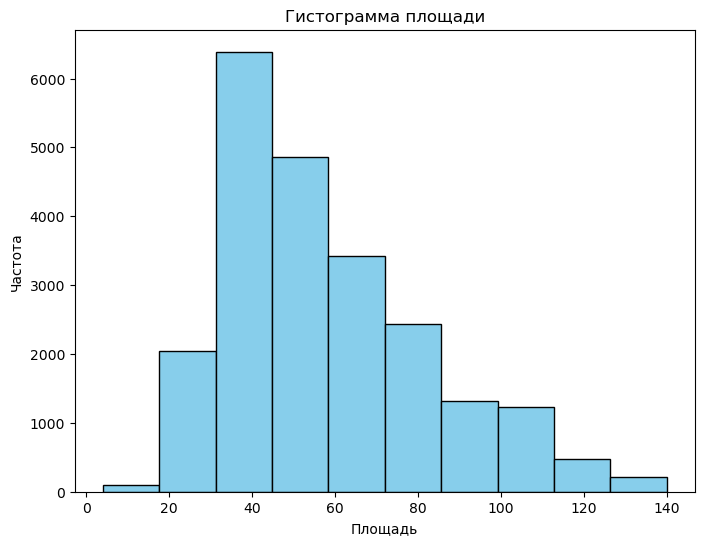

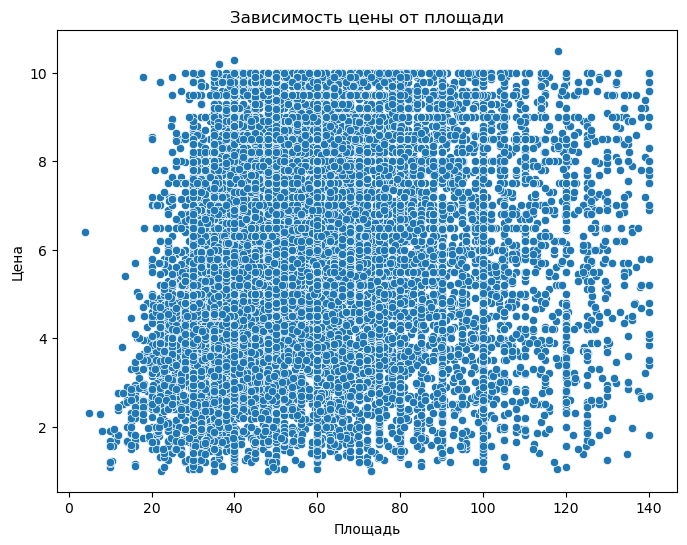

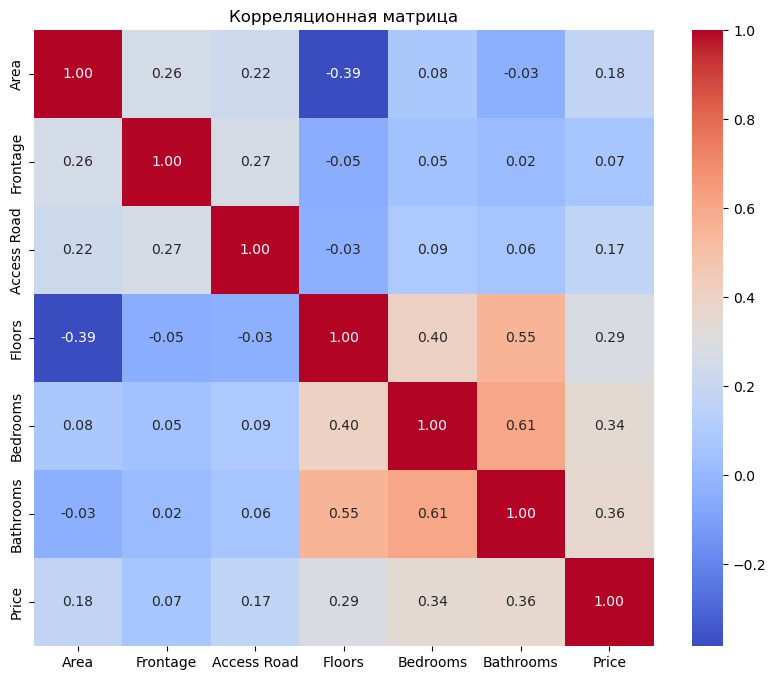


Жаңа бағандармен деректер:
   Area  Price  Price per m2
0  84.0   8.60      0.102381
1  60.0   7.50      0.125000
3  54.0   5.35      0.099074
4  92.0   6.90      0.075000
6  64.0   7.20      0.112500

Үй бағыты бойынша орташа баға:
 House direction
Đông - Nam    5.888764
Tây - Nam     5.414096
Tây - Bắc     5.367909
Đông - Bắc    5.329440
Bắc           5.245640
Tây           5.220752
Nam           5.207748
Đông          5.201298
Name: Price, dtype: float64

Бағасы 7-ден жоғары үйлер:
                                              Address  Area  Frontage  \
0   Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0  5.361581   
1   Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0  5.361581   
6   Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  64.0  4.000000   
9   Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  91.0  7.000000   
12  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0  5.361581   

    Access Road House direction Balcony direction  Floors  Bedrooms  \

C:\Users\user\AppData\Local\Temp\ipykernel_9828\4020870060.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price per m2'] = df_cleaned['Price'] / df_cleaned['Area']  # Баға мен алаңның арақатысын есептеу
C:\Users\user\AppData\Local\Temp\ipykernel_9828\4020870060.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price per m2'] = df_cleaned.apply(lambda row: row['Price'] / row['Area'] if row['Area'] > 0 else None, axis=1)  # Apply() әдісімен жаңа бағанды есептеу


In [1]:
#Кистаубаева Асель, Аналитика больших данных дисциплинасының эмтихан жобасы
#Бұл датасет Вьетнамдағы үйлердің әртүрлі критерийлері бойынша сипаттамалары, болашақта сол жерден үйлі болуға қызыққан жандарға анализ үшін жақсы датасет. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Деректер жиынын жүктеу
# 'vietnam_housing_dataset.csv' файлынан деректерді жүктейміз.
df = pd.read_csv('vietnam_housing_dataset.csv')

# 2. Деректер туралы жалпы ақпарат
# Деректер жиынының құрылымын, бағандарды және деректер типтерін көреміз.
print("Алғашқы деректер туралы ақпарат:")
print(df.info())  # DataFrame туралы жалпы ақпарат: бағандар, олардың типтері, жетіспейтін мәндер

# 3. Негізгі статистикалық сипаттамалар
# Деректер жиынындағы сандық бағандар бойынша негізгі статистиканы көреміз (орташа мән, минимум, максимум, т.б.).
print("\nНегізгі статистика:")
print(df.describe())  # Статистикалық сипаттамалар (орташа, стандартты ауытқу, т.б.)

# 4. Жетіспейтін мәндермен жұмыс
# Сандық деректер үшін жетіспейтін мәндерді толтыру:
# Әрбір сандық бағанның жетіспейтін мәндерін сол бағанның орташа мәнімен толтырамыз.
numeric_columns = df.select_dtypes(include=['float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Сандық бағандардағы жетіспейтін мәндерді орташа мәндермен толтыру

# Сандық емес деректер үшін жетіспейтін мәндерді толтыру:
# Әрбір сандық емес бағанның жетіспейтін мәндерін сол бағанның ең жиі кездесетін мәнімен толтырамыз (мода).
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])  # Сандық емес бағандардағы жетіспейтін мәндерді модамен толтыру

# Жетіспейтін мәндер тексерісі
# Жетіспейтін мәндер жойылғаннан кейін деректер жиынының қайта құрылымын тексереміз.
print("\nЖетілдірілген деректер туралы ақпарат:")
print(df.info())  # Қайта тексеру: жетіспейтін мәндер жойылғаннан кейін жаңартылған ақпарат

# 5. Деректердегі ауытқуларды анықтау және жою
# Ауытқуларды анықтау үшін IQR (interquartile range) әдісін қолданамыз.
numeric_df = df.select_dtypes(include=['float64'])  # Тек сандық бағандарды таңдаймыз
Q1 = numeric_df.quantile(0.25)  # 25-перцентиль (Q1)
Q3 = numeric_df.quantile(0.75)  # 75-перцентиль (Q3)
IQR = Q3 - Q1  # Ауытқулардың аралығы

# Ауытқуларды табу:
# Егер деректер Q1-ден 1.5 еселенген IQR төмен немесе Q3-ке 1.5 еселенген IQR жоғары болса, олар ауытқулар болып есептеледі.
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))  
outliers_count = outliers.sum()  # Ауытқулар саны
print("\nАуытқулар саны:\n", outliers_count)  # Ауытқуларды санап шығарамыз

# Ауытқуларды жою:
# Ауытқулары бар жолдарды жойып, таза деректер жиынын құрамыз.
df_cleaned = df[~outliers.any(axis=1)]  # Ауытқулары бар жолдарды алып тастаймыз
print(f"\nЖаңа деректер жиынының өлшемі: {df_cleaned.shape}")  # Жаңа деректер жиынының өлшемі

# 6. Визуализация
# Гистограмма құру: Площадь бағанының деректерін визуалдау
plt.figure(figsize=(8, 6))  # Графиктің өлшемін орнатамыз
plt.hist(df_cleaned['Area'], bins=10, color='skyblue', edgecolor='black')  # Гистограмма
plt.title('Гистограмма площади')  # График атауы
plt.xlabel('Площадь')  # X осінің атауы
plt.ylabel('Частота')  # Y осінің атауы
plt.show()  # Графикті көрсетеміз

# Диаграмма рассеяния: Площадь пен Баға арасындағы тәуелділікті көрсету
plt.figure(figsize=(8, 6))  # Графиктің өлшемін орнатамыз
sns.scatterplot(x='Area', y='Price', data=df_cleaned)  # Диаграмма рассеяния
plt.title('Зависимость цены от площади')  # График атауы
plt.xlabel('Площадь')  # X осінің атауы
plt.ylabel('Цена')  # Y осінің атауы
plt.show()  # Графикті көрсетеміз

# Корреляциялық матрица: Сандық бағандар арасындағы корреляцияны көрсету
numeric_df_cleaned = df_cleaned.select_dtypes(include=['float64'])  # Тек сандық бағандарды таңдаймыз
plt.figure(figsize=(10, 8))  # Графиктің өлшемін орнатамыз
sns.heatmap(numeric_df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Корреляциялық матрица
plt.title('Корреляционная матрица')  # График атауы
plt.show()  # Графикті көрсетеміз

# 7. Деректерді түрлендіру
# Жаңа баған құру: Баға мен алаңның арақатысын есептеу (бір шаршы метрге шаққандағы баға)
df_cleaned['Price per m2'] = df_cleaned['Price'] / df_cleaned['Area']  # Баға мен алаңның арақатысын есептеу
print("\nЖаңа бағандармен деректер:")
print(df_cleaned[['Area', 'Price', 'Price per m2']].head())  # Жаңа бағанды көрсету

# 8. Группировка және агрегация
# Үйдің бағыты бойынша орташа бағаны есептеу
price_by_direction = df_cleaned.groupby('House direction')['Price'].mean().sort_values(ascending=False)  # Орташа баға есептеу
print("\nҮй бағыты бойынша орташа баға:\n", price_by_direction)  # Нәтижені көрсету

# 9. Фильтрация
# Бағасы 7-ден жоғары үйлерді сүзу
high_price = df_cleaned[df_cleaned['Price'] > 7]  # Бағасы 7-ден жоғары үйлерді таңдау
print("\nБағасы 7-ден жоғары үйлер:")
print(high_price.head())  # Нәтижені көрсету

# 10. Apply() әдісін қолдану
# Жаңа баған құру: Жер көлеміне байланысты баға есептеу
df_cleaned['Price per m2'] = df_cleaned.apply(lambda row: row['Price'] / row['Area'] if row['Area'] > 0 else None, axis=1)  # Apply() әдісімен жаңа бағанды есептеу
print("\nЖаңа баған 'Price per m2':")
print(df_cleaned[['Area', 'Price', 'Price per m2']].head())  # Жаңа бағанды көрсету
